### 1. Importing the Libraries

In [1]:
import pandas as pd

### 2. Importing the Dataset

In [2]:
data = pd.read_csv('heart.csv')

### 3. Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Duplicate Values

In [4]:
data_dup = data.duplicated().any()
data_dup

True

In [5]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()
data_dup

False

### 5. Data Processing

In [6]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [7]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Categorical Data

In [8]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 7. Feature Scaling

In [11]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 8. Splitting The Dataset Into The Training Set And Test Set

In [13]:
X = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9016393442622951

### 10. SVM

In [17]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [18]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8688524590163934

### 11. KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [21]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

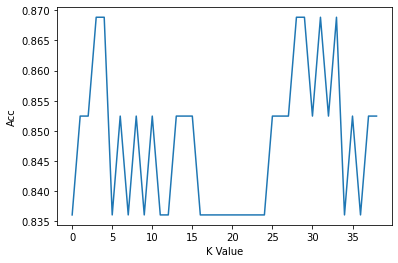

In [22]:
import matplotlib.pyplot as plt

plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [23]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

### 12. Dividing the Data into Training and Testing sets

In [24]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()

X = data.drop('target',axis=1)
y=data['target']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 13. Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7868852459016393

### 14. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8524590163934426

### 15.Comparision

In [29]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100]})

final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,78.688525
4,RF,85.245902


D:\PYTHON CODING\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

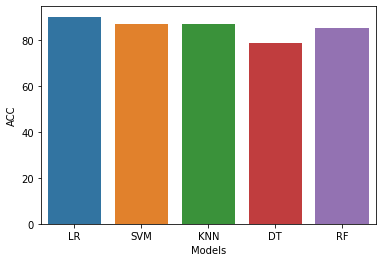

In [30]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])

In [31]:
from sklearn.ensemble import RandomForestClassifier

X=data.drop('target',axis=1)
y=data['target']

rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 16. Prediction on New Data

In [32]:
import pandas as pd

new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [33]:
p = rf.predict(new_data)
if p[0]==0:
    print("The Person does not have Heart Disease")
else:
    print("The Person does may have Heart Disease")

The Person does not have Heart Disease


### 17. Save Model Using Joblib

In [34]:
import joblib
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [35]:
model = joblib.load('model_joblib_heart')
model.predict(new_data)

array([0], dtype=int64)

In [36]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 18.GUI

In [43]:
from tkinter import *
import joblib


def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="____________________").grid(row=30)
        Label(master, text="| No Heart Disease |").grid(row=31)
        Label(master, text="‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾").grid(row=32)
    else:
        Label(master, text="________________________________").grid(row=30)
        Label(master, text="| Possibility of Heart Disease |").grid(row=31)
        Label(master, text="‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾").grid(row=32)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "====> Heart Disease Prediction System <===="
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

D:\PYTHON CODING\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
